In [63]:
import pandas as pd

In [64]:
housing = pd.read_csv("housing.csv")

In [65]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [66]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [67]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
housing['ocean_proximity'].value_counts() #We see that they are categorical values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

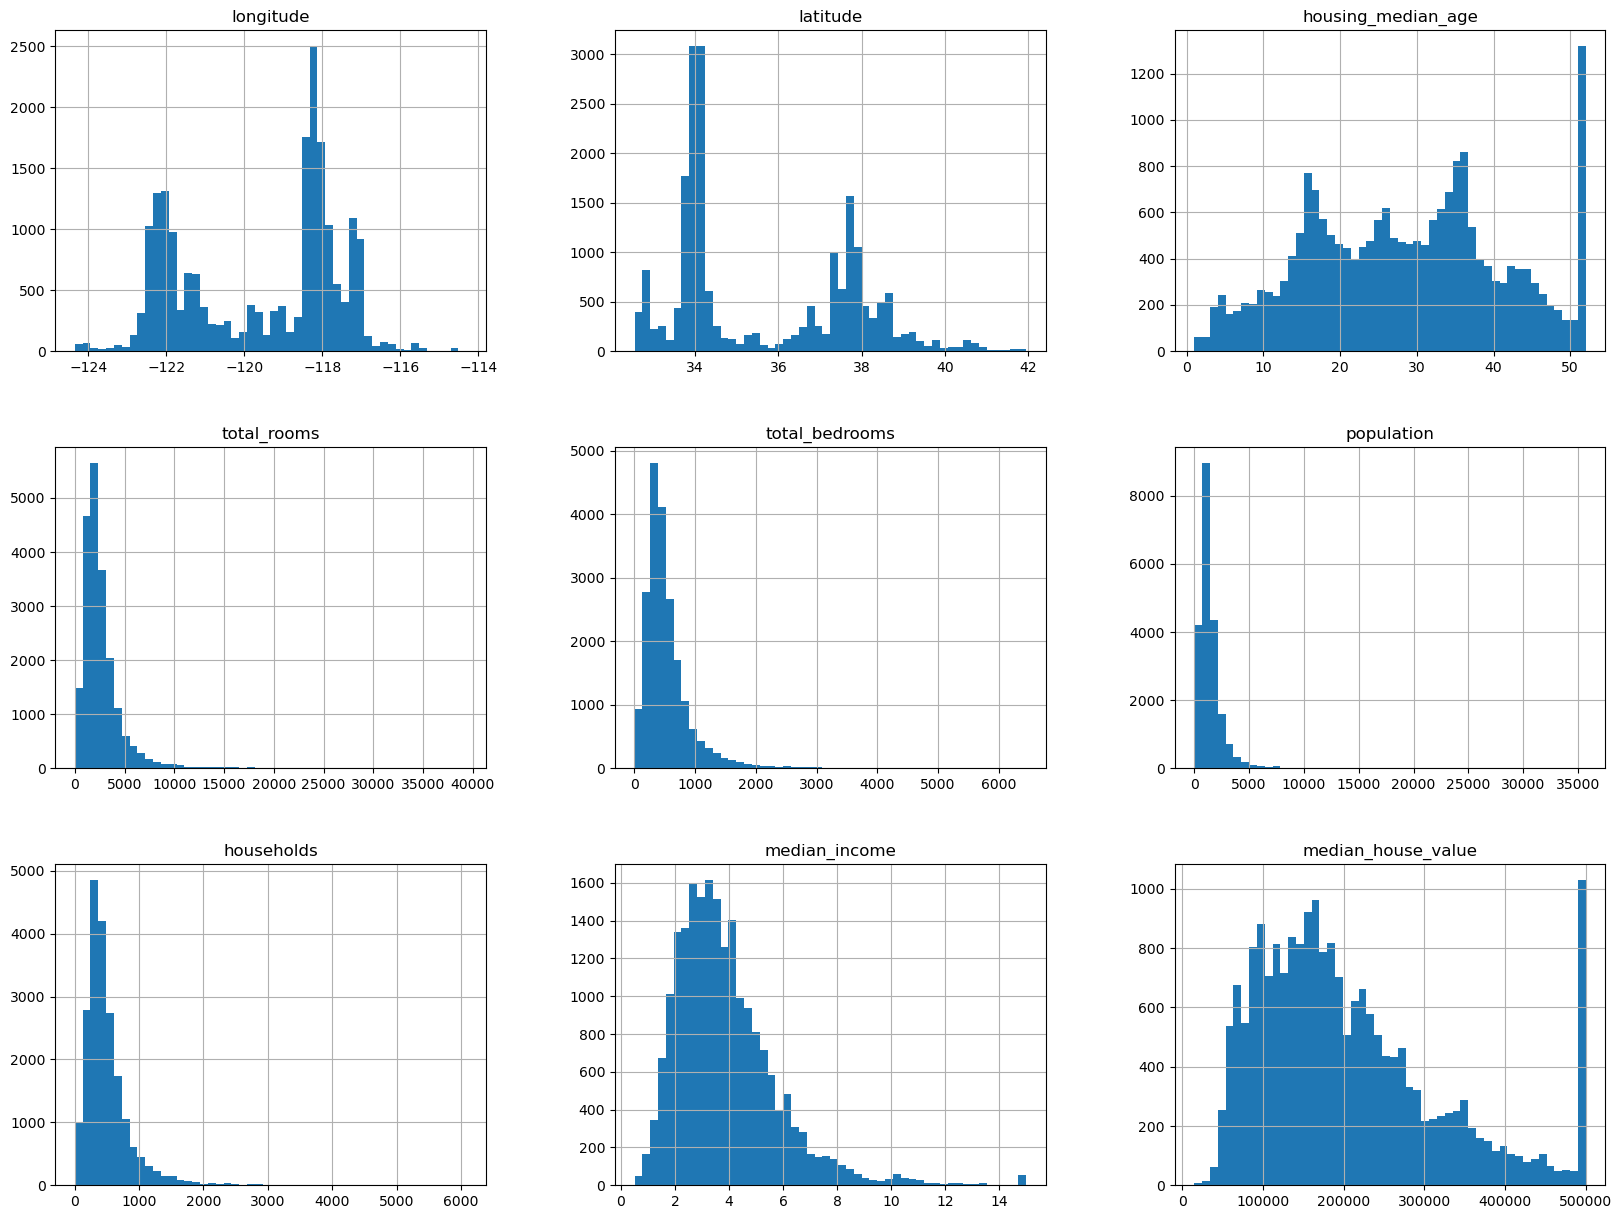

In [69]:

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


<Axes: xlabel='longitude', ylabel='latitude'>

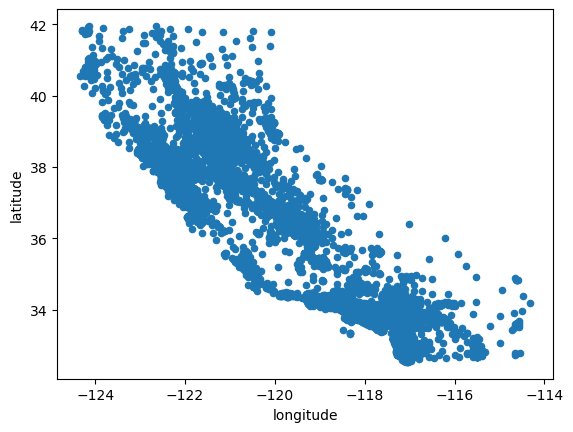

In [70]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

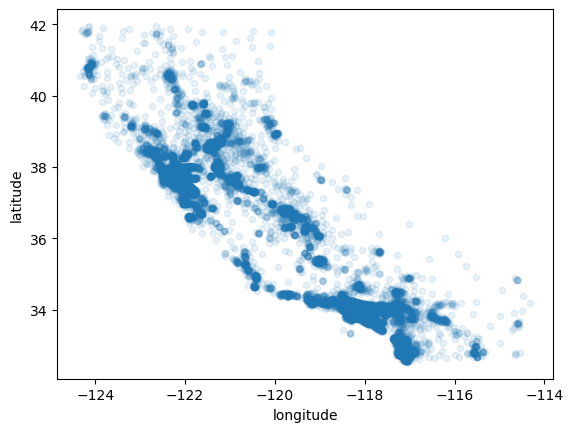

In [71]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

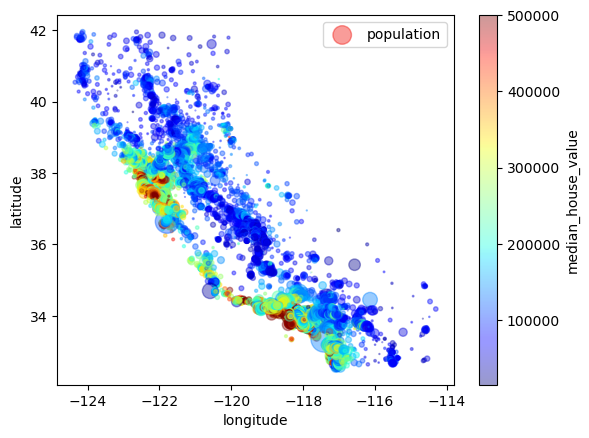

In [72]:
housing.plot(kind="scatter", x="longitude", y="latitude",
alpha=0.4, s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"),
colorbar=True, )#We see that the rich people live by the cost

In [73]:
#we pick the fearues that have a strong correlation with price that we can use to train the models to predict price 
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_house'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [74]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_house,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [75]:
ocean = housing['ocean_proximity'] #Dropping ocean proximity because it is a string
housing.drop('ocean_proximity', axis = 1, inplace = True)

In [76]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_house,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [77]:
corr_matrix = housing.corr()

In [78]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_house,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


In [79]:
corr_matrix["median_house_value"].sort_values(ascending=False) #We are looking at the correlation between all the values listed and median house value


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_house         -0.255880
Name: median_house_value, dtype: float64

In [80]:
from sklearn.impute import SimpleImputer

In [81]:
sc = SimpleImputer(strategy = 'median')

In [82]:
scaled = sc.fit_transform(housing)

In [83]:
scaled

array([[-122.23      ,   37.88      ,   41.        , ...,    6.98412698,
           0.14659091,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    6.23813708,
           0.15579659,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    8.28813559,
           0.12951602,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    5.20554273,
           0.21517303,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    5.32951289,
           0.21989247,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    5.25471698,
           0.22118492,    2.61698113]])

In [84]:
housing = pd.DataFrame(scaled, columns=housing.columns)

In [85]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  bedrooms_per_house        20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [86]:
ocean.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [87]:
ocean = pd.get_dummies(ocean, prefix = 'ocean_')

In [88]:
ocean.head()

,ocean__<1H OCEAN,ocean__INLAND,ocean__ISLAND,ocean__NEAR BAY,ocean__NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [89]:
housing = pd.concat([housing, ocean], axis = 1).reset_index(drop=True)

In [90]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_house,population_per_household,ocean__<1H OCEAN,ocean__INLAND,ocean__ISLAND,ocean__NEAR BAY,ocean__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0


In [91]:
y = housing['median_house_value']
x = housing.drop('median_house_value', axis = 1)

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scale = StandardScaler()
scaled = scale.fit_transform(x)

In [94]:
x = pd.DataFrame(scaled, columns = x.columns)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y,test_size = 0.2, random_state = 42) 

In [97]:
Xtrain.shape

(16512, 16)

In [98]:
Xtest.shape

(4128, 16)

In [99]:
Xtrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_house,population_per_household,ocean__<1H OCEAN,ocean__INLAND,ocean__ISLAND,ocean__NEAR BAY,ocean__NEAR OCEAN
14196,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,-0.166259,-0.214287,0.059808,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
8267,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,-0.386181,0.342520,-0.128306,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
17445,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,0.087641,-0.666464,-0.033453,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
14265,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,-0.576442,0.785624,0.088940,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
2271,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,0.339282,-0.554600,-0.074203,-0.891156,1.466514,-0.015566,-0.353264,-0.384466


In [100]:
Ytest.shape

(4128,)

### y is price

In [101]:
Ytrain.shape

(16512,)

In [102]:
Ytrain.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

you don't scale your y, just your x. because we want the actual thing

## Multi-linear Regresion

### Select and train model

In [103]:
from sklearn.linear_model import LinearRegression

fit function is a training function, that is what we use to train the model

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, Ytrain)

LinearRegression()

make the model predict prices by giving it xtest (the unseen data)

In [105]:
y_pred = lin_reg.predict(Xtest)

finding parameters of the model:

In [106]:
Xtrain.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_house', 'population_per_household',
       'ocean__<1H OCEAN', 'ocean__INLAND', 'ocean__ISLAND', 'ocean__NEAR BAY',
       'ocean__NEAR OCEAN'],
      dtype='object')

In [107]:
print(f"Y Predictions: {y_pred}")

Y Predictions: [ 36668.04131357 137772.04131357 293098.04131357 ... 447416.04131357
 117316.04131357 185624.04131357]


Retrieve model parameters:

In [108]:
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

print(f"Intercept: {intercept}")
print(f"Coeffiecients: {coefficients}")

Intercept: 206696.0999878876
Coeffiecients: [-5.59439769e+04 -5.66082507e+04  1.41361226e+04  5.87534374e+03
  5.22805448e+03 -4.60944535e+04  4.04606063e+04  7.87400768e+04
  7.98992824e+03  1.67400296e+04  6.67344118e+02  5.94213997e+16
  5.56844943e+16  1.86177689e+15  3.75730258e+16  4.00716182e+16]


In [109]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

The values predicted below are the avergae(mean) misses/errors:

Mean Absolute Error

In [110]:
lin_mae = mean_absolute_error(y_pred, Ytest)
lin_mae

49651.9917357884

Mean Squared Error

In [111]:
lin_mse = mean_squared_error(y_pred, Ytest)
lin_mse

4778140469.895577

Root Mean Squared Error

In [112]:
lin_rmse = np.sqrt(mean_squared_error(y_pred, Ytest))
lin_rmse

69124.09471302736

R2 Score

In [113]:
lin_r2 = r2_score(y_pred, Ytest)
lin_r2

0.4669244596080867

In [114]:
print(f"""
Mean Absolute Error: {lin_mae},
Mean Squared Error: {lin_mse},
Root Mean Squared Error: {lin_rmse},
R2 Score: {lin_r2}
""")


Mean Absolute Error: 49651.9917357884,
Mean Squared Error: 4778140469.895577,
Root Mean Squared Error: 69124.09471302736,
R2 Score: 0.4669244596080867



## Polynomial Regression

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(Xtrain)
X_poly_test = poly.fit_transform(Xtest)

In [117]:
# Train the model
model = LinearRegression()
model.fit(X_poly_train, Ytrain)

LinearRegression()

In [118]:
# Test the model
y_pred = model.predict(X_poly_test)

In [119]:
print(f"""
Mean Absolute Error: {mean_absolute_error(y_pred, Ytest)},
Mean Squared Error: {mean_squared_error(y_pred, Ytest)},
Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred, Ytest))},
R2 Score: {r2_score(y_pred, Ytest)}
""")


Mean Absolute Error: 57337.46219372124,
Mean Squared Error: 282168418881.9313,
Root Mean Squared Error: 531195.2737759734,
R2 Score: 0.033708430982954174



## Regularized Models

In [120]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [133]:
# Train the model
model = Ridge()
model.fit(Xtrain, Ytrain)


Ridge()

In [134]:
# Test the model
y_pred = model.predict(Xtest)

In [135]:
print(f"""
Mean Absolute Error: {mean_absolute_error(y_pred, Ytest)},
Mean Squared Error: {mean_squared_error(y_pred, Ytest)},
Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred, Ytest))},
R2 Score: {r2_score(y_pred, Ytest)}
""")


Mean Absolute Error: 49644.51235117065,
Mean Squared Error: 4778509650.654031,
Root Mean Squared Error: 69126.76508165293,
R2 Score: 0.46694080778172853



## Decision Tree Regressor

much better than the rest above. yayyy

In [149]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=12)

In [150]:
dtree.fit(Xtrain, Ytrain)

DecisionTreeRegressor(max_depth=12)

In [151]:
y_pred = dtree.predict(Xtest)

In [152]:
print(f"""
Mean Absolute Error: {mean_absolute_error(y_pred, Ytest)},
Mean Squared Error: {mean_squared_error(y_pred, Ytest)},
Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred, Ytest))},
R2 Score: {r2_score(y_pred, Ytest)}
""")


Mean Absolute Error: 39409.51680536104,
Mean Squared Error: 3844221809.990607,
Root Mean Squared Error: 62001.78876444297,
R2 Score: 0.667392097956864

